In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import phone_info as ph_i 
from phonetics import plots as plots

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v2/feat_2d'
feat_path = f'{experiment_path}/feat_2d_layer_12.csv'

In [5]:
df_anotated = pd.read_csv(feat_path, index_col=0)

In [7]:
df_anotated['song'].unique()

array(['ES_volver_a_los_17', 'ES_la_sobra_de_la_luz', 'CA_impro3',
       'CA_la_pastoreta', 'ES_el_dia_que_naci_yo', 'CA_meteorit_ferit',
       'CA_sol_solet', 'ES_lucero_de_la_maniana',
       'ES_tu_que_vienes_a_rondarme', 'CA_mabravasa', 'CA_impro2',
       'ES_yo_vi_secarse_una_jara', 'CA_sol_solet-2', 'ES_tras_de_ti',
       'ES_negro_infinito', 'ES_ventura2', 'CA_tu_saps',
       'ES_que_lejos_estoy_de_la_tierra', 'ES_ventura', 'ES_galapaguito',
       'ES_milagro', 'CA_sibi_la', 'CA_un_gat_petit_tv3', 'CA_impro',
       'CA_viola', 'ES_quien_me_ama', 'CA_no_he_desitjat',
       'CA_xiqueta_meuna', 'ES_hildegart', 'ES_jota'], dtype=object)

In [10]:
df_milagro = df_anotated[df_anotated['song'] == 'ES_milagro']
df_milagro

,x,y,phone_base,song
104662,-2.493004,8.773531,AP,ES_milagro
104663,-0.084168,-1.268544,AP,ES_milagro
104664,-0.105384,-1.296954,AP,ES_milagro
104665,-0.105506,-1.322421,AP,ES_milagro
104666,-0.125776,-1.327735,AP,ES_milagro
...,...,...,...,...
109532,0.749730,-0.204897,SP,ES_milagro
109533,-2.451425,9.080406,SP,ES_milagro
109534,-2.396993,9.066996,SP,ES_milagro
109535,-2.429051,9.004930,SP,ES_milagro


In [94]:
s = df_milagro[146:294]['phone_base']

In [95]:
result = s[s != s.shift()].reset_index(drop=True)
result_string = ''.join(s[s != s.shift()])

print(result_string.replace('AP', '  AP  \n').replace('SP', ' --- SP ---'))

nueBo  AP  
aunkelByentosopleDekara  AP  



In [ ]:
df_phrase = df_milagro[146:294]
phones = df_phrase['phone_base'].unique()

(-8.0, 12.0)

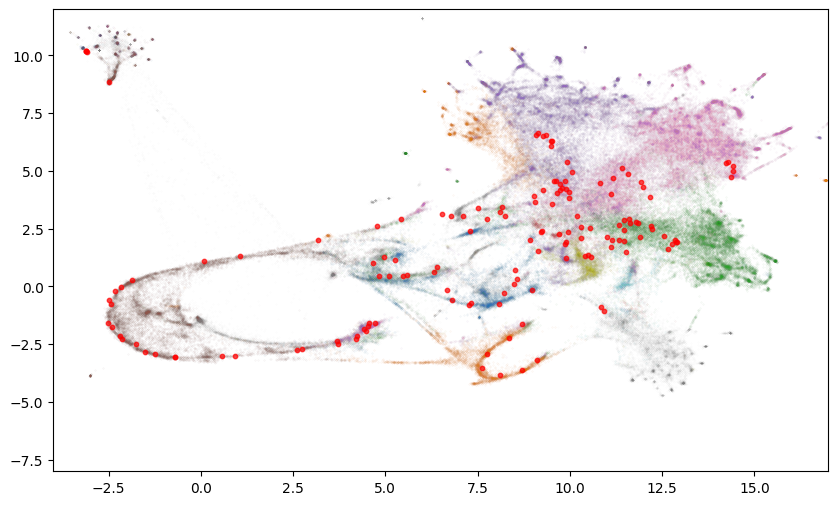

In [111]:
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
ax.scatter(df_anotated['x'],
           df_anotated['y'],
        alpha=0.05,
        s = 0.05, 
        color= 'grey')

for ph in phones:
    mask = df_anotated['phone_base'] == ph
    df_filter = df_anotated[mask]
    ax.scatter(
      df_filter['x'],
      df_filter['y'],
      alpha=0.1,
      s = 0.05, 
      label = ph)

ax.scatter(df_phrase['x'],
           df_phrase['y'],
         alpha=0.7,
         s = 10.0, 
         color= 'red')

ax.set_xlim([-4,17])
ax.set_ylim([-8,12])